# Множественная регрессия

Множественной (multiple regression) называют линейную регрессию, в модели которой число независимых переменных две или более.

Может широко применяться для:
1.	Получения наилучшего линейного уравнения прогноза.
2.	Контроля за смешиванием переменных (факторов).
3.	Оценки вклада определенной совокупности переменных.
4.	Объяснения сложного на вид многомерного комплекса взаимосвязей.
5.	Проведения дисперсионного и ковариационного анализов посредством кодирования уровней независимых переменных.

Уравнение множественной линейной регрессии имеет вид:

Y=b0+b1x1+b2x2+…+bnxn

Как и в простой линейной регрессии, параметры модели bn вычисляются при помощи метода наименьших квадратов.

Отличие между простой и множественной линейной регрессией заключается в том, что вместо линии регрессии в ней используется гиперплоскость.

Преимущество множественной линейной регрессии по сравнению с простой заключается в том, что использование в модели нескольких входных переменных позволяет увеличить долю объясненной дисперсии выходной переменной и таким образом улучшить соответствие модели данным. Т.е. при добавлении в модель каждой новой переменной коэффициент детерминации растет.

Однако в множественной линейной регрессии возникают и проблемы, не характерные для простой модели:
- возможно появление мультиколлинеарности ;
- необходимо выбирать лучшую модель, в которой минимальный набор независимых переменных сможет объяснить наибольшую долю дисперсии зависимой. 

Для построения множественной линейной регрессии откроем новый блокнот и загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np

In [2]:
%run f2forecast.py

Загрузим и изучим структуру датасета.

*Данные синтетические и не отражают реальную ситуацию.*

In [4]:
df=pd.read_excel("dataset_lr.xlsx")
df.head()

,месяц,год,Средний вес поезда,Ср сут пробег,Ср сут производ-сть,Участковая скорость,Техническая скорость,Следование резервом,Грузооборот,Общий пробег,Вспомогательный пробег,Рабочий парк
0,1,2014,4027.789098,641.960404,1856.454766,43.490513,48.650967,46.806034,1.752266e+07,6468934.502,1394763.702,304.476691
1,2,2014,3990.677837,626.769432,1851.758001,42.398022,48.033059,44.161943,1.705135e+07,6140064.462,1150773.482,328.864210
2,3,2014,3975.466383,612.606054,1803.552082,41.240079,47.262731,43.586246,1.892131e+07,6862058.505,1244170.025,338.423825
3,4,2014,3938.356174,599.205064,1780.019054,40.198248,46.623835,39.842432,1.845964e+07,6647757.413,1119267.113,345.682531
4,5,2014,3914.920860,592.566632,1754.171330,39.482134,45.995732,39.464017,1.832765e+07,6658906.510,1167675.180,337.033450


Целевой величиной для нас является «Рабочий парк».

На всякий случай выполним заполнение нулями ячеек с пропусками.

In [5]:
df.fillna(0, inplace=True)

Изучим динамику фактических значений нашего ряда.

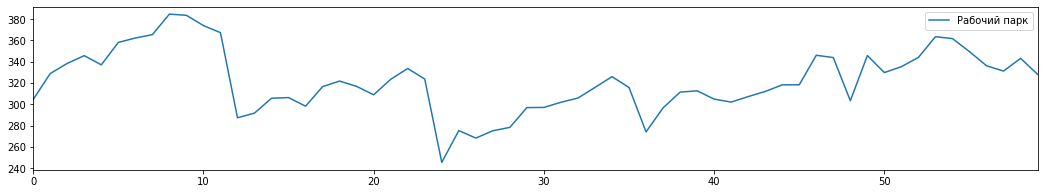

In [5]:
df[['Рабочий парк']].plot(figsize=(18,3))

Посмотрим, какие параметры в датасете связаны с нашей целевой переменной.

In [8]:
df.columns

Index(['месяц', 'год', 'Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк'],
      dtype='object')

Построим матрицы рассеивания для значащих столбцов.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdd8eb2860>


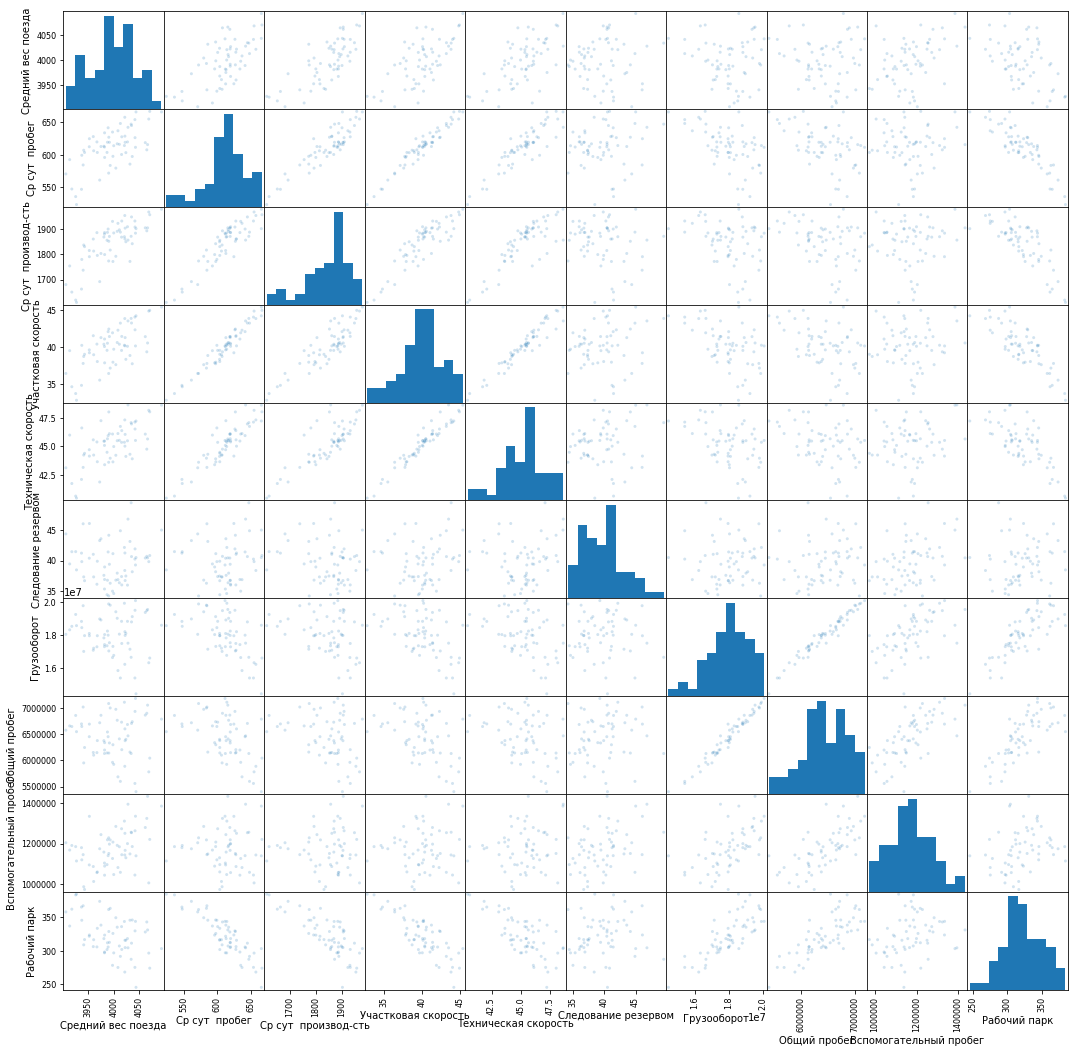

In [6]:
scatter_matrix(df[['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк']], figsize=(18,18), alpha=0.2)

Посчитаем парные корреляции и отразим их на диаграмме. Передадим функции h_map на датасет и уровень значимости корреляции.

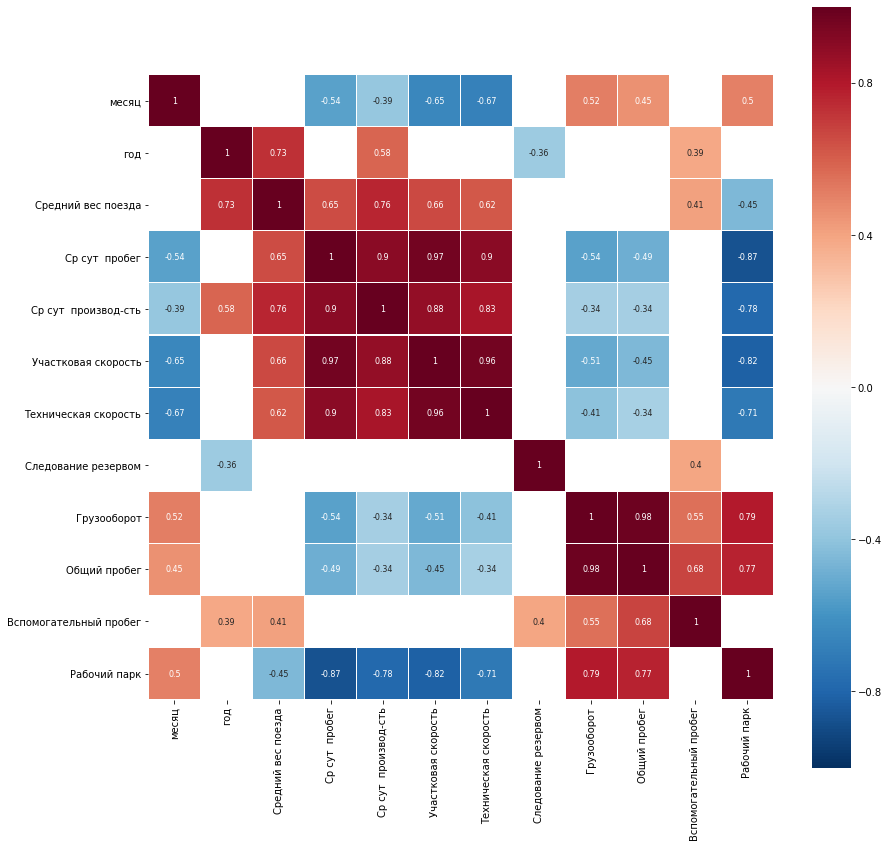

In [7]:
h_map(df, 0.3)

Разделим переменные на целевую и объясняющие.

In [8]:
col=['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег']
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Рабочий парк']

Натренируем модель и изучим результаты. 

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     213.6
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           1.04e-36
Time:                        21:55:41   Log-Likelihood:                -177.27
No. Observations:                  60   AIC:                             374.5
Df Residuals:                      50   BIC:                             395.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -195

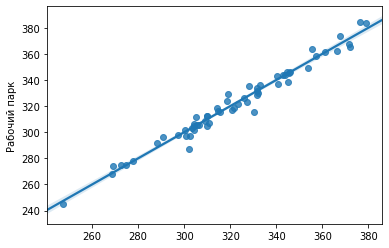

In [9]:
X=sm.add_constant(X)

reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
r=res.predict(X)
r=np.array(res)
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

На что обратить внимание:
- R-square получился достаточно значимым. Должен не сильно отличаться от Adj. R-square.
- F-statistic должно быть существенно выше 4.
- Для регрессоров P>|t| должен быть меньше 0,05, а t выходить за интервал [-2,5 : 2,5], это позволяет нам отвергнуть гипотезу о нулевом влиянии регрессора.

В нашем случае модель получилась незначимой, так как удовлетворяются не все условия.

Ниже – расшифровка части важной информации по итогам работы модели. Эти показатели позволяют оценить ее качество и адекватность.

**BIC** - информационный критерий. Похож на AIC, но имеет более высокий штраф для моделей с большим количеством параметров. Чем меньше значение, тем лучше.

**Omnibus** - тест на асимметрию и эксцесс остатков. Мы надеемся увидеть значение, близкое к нулю, которое указывало бы на нормальность. The Prob (Omnibus) выполняет статистический тест, показывающий вероятность того, что остатки нормально распределены. Мы надеемся увидеть здесь что-то близкое к 1. В случае если Omnibus относительно низок, а Prob (Omnibus) относительно высок, остатки в целом нормальны, но не идеальны. Подход с линейной регрессией, вероятно, будет лучше, чем случайное угадывание, но, вероятно, хуже нелинейных подходов.

**Skew** - мера симметрии данных. Мы хотим видеть что-то близкое к нулю, это указывает на то, что остаточное распределение нормально.

**Kurtosis** - это мера «пиковости» или кривизны данных. Более высокие пики приводят к большему куртозу. Большой куртоз можно интерпретировать как более плотную кластеризацию остатков около нуля, что подразумевает лучшую модель с небольшим количеством выбросов (т.е. чем больше, тем лучше).

**Cond. No.** - значения больше 20 вызывают подозрения в мультиколлинеарности. Чаще всего сложно пройти данный тест. Чем меньше, тем лучше.

**R2** - насколько переменные хорошо объясняют разброс оценок. Максимальное значение – 1. Но при значениях более 0,9 надо крайне внимательно проверить на эффект мультиколлинеарности.

**Durbin-Watson** - тест на наличие автокорреляции в остатках. В идеале значение должно стремиться к 2 (минимальное значение – 0, максимальное – 4). Значения меньше 0,8 однозначно указывают на циклические колебания в остатках. Эмпирически считается, что статистика лежит в нормальных пределах, если больше 1,5 и меньше 2,5.

**Jarque-Bera (JB)** - тест на нормальность остатков. Используется на больших наборах данных, более 2000. По своей сути аналогичен Omnibus.

Выполним подбор регрессоров, при которых будут минимальная мультиколлинеарность и высокая точность. 

In [11]:
res=get_factors(df, Y, col)

Количество комбинаций  512
Результаты перебора в порядке возрастания MSE:
         MSE        r2                                         Переменные
0    71.1899  0.916341  [Следование резервом, Грузооборот, Участковая ...
1    81.3011  0.904459  [Следование резервом, Общий пробег, Участковая...
2   102.7088  0.879302  [Следование резервом, Ср сут  производ-сть, Ср...
3   108.9930  0.871917         [Общий пробег, Участковая скорость, const]
4   118.4978  0.860747          [Грузооборот, Участковая скорость, const]
5   119.4214  0.859662  [Вспомогательный пробег, Следование резервом, ...
6   135.1980  0.841122    [Вспомогательный пробег, Ср сут  пробег, const]
7   139.1183  0.836515  [Следование резервом, Техническая скорость, Ср...
8   155.2335  0.817577       [Следование резервом, Ср сут  пробег, const]
9   169.9866  0.800240  [Вспомогательный пробег, Следование резервом, ...
10  178.9255  0.789736  [Вспомогательный пробег, Участковая скорость, ...
11  180.1576  0.788288      [Техническ

Выведем список регрессоров лучшей модели.

In [12]:
res.loc[0][2]

['Следование резервом', 'Грузооборот', 'Участковая скорость', 'const']

Построим и интерпретируем лучшую модель.

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           3.92e-30
Time:                        22:01:01   Log-Likelihood:                -213.10
No. Observations:                  60   AIC:                             434.2
Df Residuals:                      56   BIC:                             442.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Следование резервом     2.0957    

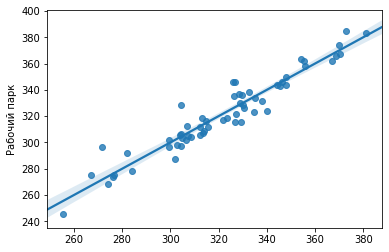

In [13]:
Y=df['Рабочий парк']
df=sm.add_constant(df)
#укажем пермеенные, которые будем использовать в качестве регрессоров
X=df[['Следование резервом', 'Грузооборот', 'Участковая скорость', 'const']]
reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

Объясняющее уравнение для нашей модели будет выглядеть так:

**Рабочий парк = 2,0957 x Следование резервом + 1,151 x 10-5 x Грузооборот – 6,5204 x Участковая скорость + 292,2525**

# Модель Монте-Карло

Методы Монте-Карло — группа численных методов для изучения случайных процессов. Суть метода заключается в следующем: процесс описывается математической моделью с использованием генератора случайных величин, модель многократно обсчитывается, на основе полученных данных вычисляются вероятностные характеристики рассматриваемого процесса. Например, чтобы узнать методом Монте-Карло, какое в среднем будет расстояние между двумя случайными точками в круге, нужно взять координаты большого числа случайных пар точек в границах заданной окружности, для каждой пары вычислить расстояние, а потом для них посчитать среднее арифметическое.

Методы используются для решения задач в различных областях физики, химии, математики, экономики, оптимизации, теории управления и др.

Название метода происходит от района Монте-Карло, известного своими казино.

Процесс включает следующие этапы:
1.	Определение модели или алгоритма, которые наиболее точно описывают поведение исследуемой системы.
2.	Многократное применение модели с использованием генератора случайных чисел для получения выходных данных модели (моделирование системы). При необходимости моделируют воздействие неопределенности. Модель записывают в форме уравнения, выражающего соотношение между входными и выходными параметрами. Значения, отобранные в качестве входных данных, получают исходя из соответствующих распределений вероятностей, характеризующих неопределенности данных.
3.	С помощью компьютера многократно используют модель (часто до 10000 раз) с различными входными данными и получают выходные данные. Они могут быть обработаны с помощью статистических методов для получения оценок среднего, стандартного отклонения, доверительных интервалов.

Преимущества:
- Метод может быть адаптирован к любому распределению входных данных, включая эмпирические распределения, построенные на основе наблюдений за соответствующими системами.
- Модели относительно просты для работы и могут быть при необходимости расширены.
- Метод позволяет учесть любые воздействия и взаимосвязи, включая такие тонкие, как условные зависимости.
- Для идентификации сильных и слабых влияний может быть применен анализ чувствительности.
- Модели являются понятными, а взаимосвязь между входами и выходами - прозрачной.
- Метод позволяет достичь требуемой точности результатов.
- Программное обеспечение метода доступно и относительно недорого.

Недостатки:
- Точность решений зависит от количества итераций, которые могут быть выполнены (этот недостаток становится менее значимым с увеличением быстродействия компьютера).
- Метод предполагает, что неопределенность данных можно описать известным распределением.
- Большие и сложные модели могут представлять трудности для специалистов по моделированию и затруднять вовлечение заинтересованных сторон.
- Метод не может адекватно моделировать события с очень высокой или очень низкой вероятностью появления, что ограничивает его применение при анализе риска.

## Реализация модели Монте-Карло
Построим модель Монте-Карло по нашему уравнению множественной регрессии. Зададим количество экспериментов:

In [19]:
size = 1000

Изучим распределение регрессоров на гистограммах.

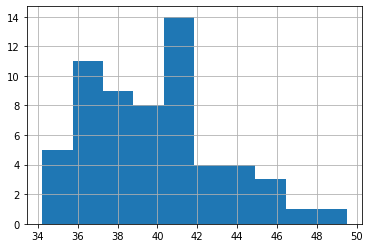

In [14]:
df['Следование резервом'].hist()

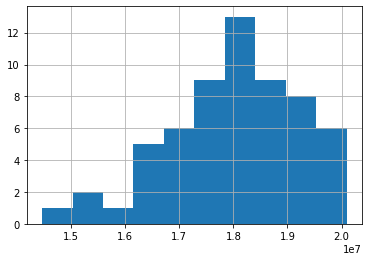

In [15]:
df['Грузооборот'].hist()

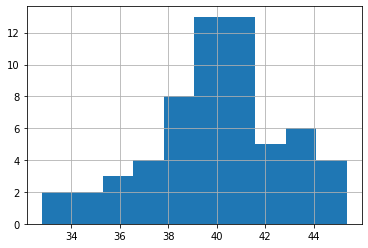

In [16]:
df['Участковая скорость'].hist()

Кроме этого, нам понадобятся основные статистики данных переменных.

In [17]:
df[['Следование резервом', 'Грузооборот', 'Участковая скорость']].describe()

,Следование резервом,Грузооборот,Участковая скорость
count,60.000000,6.000000e+01,60.000000
mean,39.775652,1.799936e+07,40.042498
std,3.372028,1.227346e+06,2.761971
min,34.220421,1.446510e+07,32.790784
25%,36.911014,1.728183e+07,38.600381
50%,39.841182,1.804833e+07,40.164294
75%,41.435805,1.886082e+07,41.595073
max,49.481372,2.009155e+07,45.361862


Будем использовать отсюда среднее (хотя чаще всего желательно брать моду), минимальное и максимальное значения.

Мы видим, что «Следование резервом» и «Грузооборот» имеют скорее треугольные распределения, а «Участковая скорость» - нормальное распределение.

Сгенерируем их.

(array([ 44.,  95., 158., 204., 163., 129.,  83.,  62.,  45.,  17.]),
 array([34.29878157, 35.84176956, 37.38475754, 38.92774552, 40.47073351,
        42.01372149, 43.55670947, 45.09969746, 46.64268544, 48.18567342,
        49.7286614 ]),
 <a list of 10 Patch objects>)

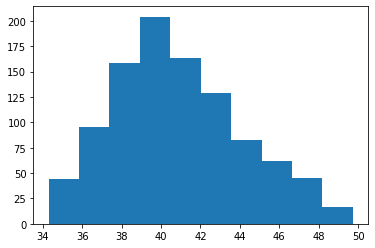

In [20]:
reserv = np.random.triangular(left = 34, mode = 39, right = 50, size = size)
plt.hist(reserv)

(array([ 22.,  48.,  74., 116., 144., 168., 185., 124.,  91.,  28.]),
 array([14613388.31792973, 15155950.72254702, 15698513.12716431,
        16241075.5317816 , 16783637.93639889, 17326200.34101618,
        17868762.74563347, 18411325.15025076, 18953887.55486805,
        19496449.95948534, 20039012.36410264]),
 <a list of 10 Patch objects>)

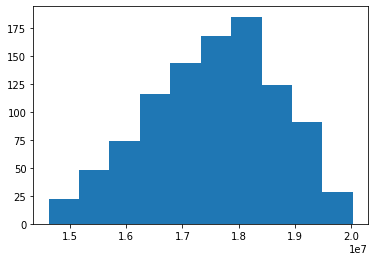

In [21]:
gruz = np.random.triangular(left = 1.446510e+07, mode = 1.799936e+07, right = 2.009155e+07, size = size)
plt.hist(gruz)

(array([  6.,  20.,  76., 179., 236., 258., 150.,  55.,  16.,   4.]),
 array([30.99498819, 32.84082294, 34.6866577 , 36.53249246, 38.37832721,
        40.22416197, 42.06999672, 43.91583148, 45.76166624, 47.60750099,
        49.45333575]),
 <a list of 10 Patch objects>)

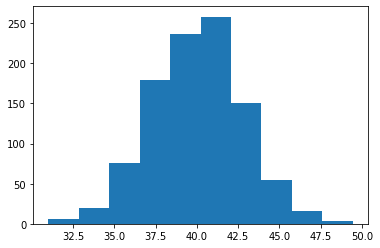

In [22]:
speed = np.random.normal(loc = 40.0, scale = 2.76, size = size)
plt.hist(speed)

Переменные reserve, gruz, speed хранят таблицы (списки) с результатами 1000 случайных экспериментов. Нам остается только подставить их вместо переменных в нашем уравнении регрессии, чтобы получить в результате количество локомотивов, которое потребовалось.

In [23]:
lok=2.0957*reserv+1.151e-05*gruz-6.5204*speed+292

Посмотрим распределение случаев по количеству локомотивов.

(array([  1.,   1.,   6.,  10.,  13.,  36.,  65.,  92., 120., 124., 145.,
        120., 100.,  68.,  50.,  26.,  14.,   5.,   2.,   2.]),
 array([236.02063621, 244.12360584, 252.22657546, 260.32954508,
        268.4325147 , 276.53548432, 284.63845394, 292.74142356,
        300.84439318, 308.9473628 , 317.05033242, 325.15330204,
        333.25627166, 341.35924128, 349.4622109 , 357.56518052,
        365.66815014, 373.77111976, 381.87408938, 389.977059  ,
        398.08002862]),
 <a list of 20 Patch objects>)

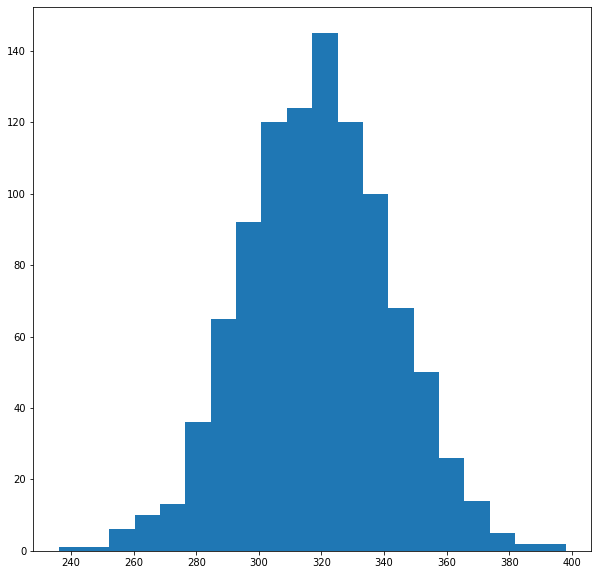

In [24]:
plt.figure(figsize=(10,10))
plt.hist(lok, bins=20)

Наиболее часто требуется около 325 локомотивов.
Можем провести моделирование, сколько локомотивов нам оптимально содержать.


(array([  1.,   6.,   5.,  14.,  21.,  60.,  80.,  95., 114., 124., 110.,
        103.,  84.,  63.,  48.,  30.,  21.,  10.,   9.,   2.]),
 array([-49.74792361, -42.62084467, -35.49376572, -28.36668677,
        -21.23960783, -14.11252888,  -6.98544993,   0.14162901,
          7.26870796,  14.39578691,  21.52286585,  28.6499448 ,
         35.77702374,  42.90410269,  50.03118164,  57.15826058,
         64.28533953,  71.41241848,  78.53949742,  85.66657637,
         92.79365532]),
 <a list of 20 Patch objects>)

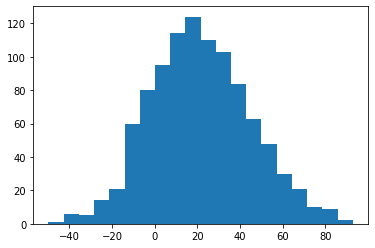

In [36]:
plt.hist(340-lok, bins=20)

In [25]:
np.count_nonzero((340-lok)<0)

177

В этом количестве случаев нам не хватило локомотивов.

(array([  2.,   2.,   5.,  14.,  26.,  50.,  68., 100., 120., 145., 124.,
        120.,  92.,  65.,  36.,  13.,  10.,   6.,   1.,   1.]),
 array([-18.08002862,  -9.977059  ,  -1.87408938,   6.22888024,
         14.33184986,  22.43481948,  30.5377891 ,  38.64075872,
         46.74372834,  54.84669796,  62.94966758,  71.0526372 ,
         79.15560682,  87.25857644,  95.36154606, 103.46451568,
        111.5674853 , 119.67045492, 127.77342454, 135.87639416,
        143.97936379]),
 <a list of 20 Patch objects>)

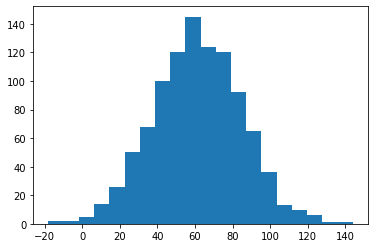

In [27]:
plt.hist(380-lok, bins=20)

In [28]:
np.count_nonzero((380-lok)<0)

4

Если мы будем держать 380 локомотивов, то только в 4 случаях из 1000 экспериментов не сможем обеспечить спрос.

# Другие виды распределений

Приведем другие популярные типы распределения случайных величин.

## Равномерное распределение

(array([122.,  73.,  99.,  99.,  80., 116., 113., 106.,  82., 110.]),
 array([50.00732922, 52.50595497, 55.00458072, 57.50320647, 60.00183221,
        62.50045796, 64.99908371, 67.49770946, 69.99633521, 72.49496096,
        74.99358671]),
 <a list of 10 Patch objects>)

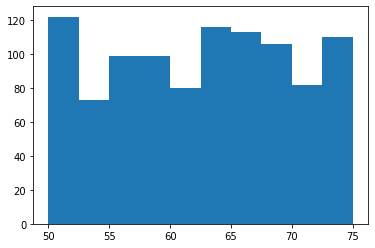

In [29]:
M1_sample = np.random.uniform(low = 50.0, high = 75.0, size = size)
plt.hist(M1_sample)

## Дискретное распределение

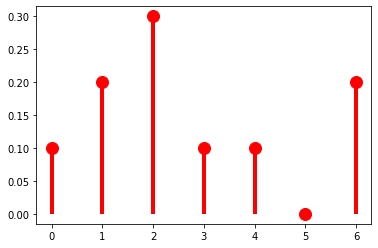

In [47]:
#инициация распределения
from scipy import stats
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

(array([ 6., 11.,  0., 39.,  0., 13.,  8.,  0.,  0., 23.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

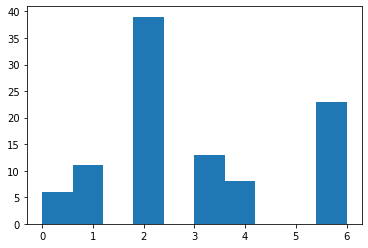

In [48]:
R = custm.rvs(size=100)
plt.hist(R)

## Гамма-распределение

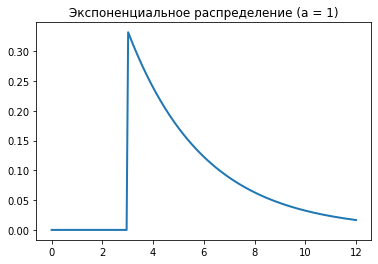

In [30]:
#инициация распределения
from scipy.stats import gamma
gamma_distribution = gamma(loc = 3, scale = 3, a = 1)
x = np.linspace(0, 12, 200)
_, ax = plt.subplots(1, 1)
ax.plot(x, gamma_distribution.pdf(x), '-', lw=2)
plt.title('Экспоненциальное распределение (a = 1)')
plt.show()

(array([480., 249., 135.,  59.,  31.,  22.,  12.,   8.,   2.,   2.]),
 array([ 3.0028384 ,  4.89716695,  6.79149549,  8.68582404, 10.58015258,
        12.47448113, 14.36880968, 16.26313822, 18.15746677, 20.05179531,
        21.94612386]),
 <a list of 10 Patch objects>)

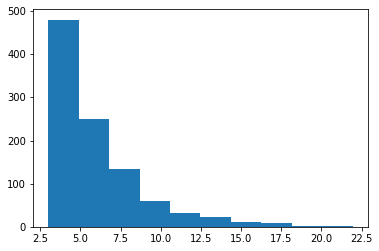

In [31]:
plt.hist(gamma_distribution.rvs(1000))